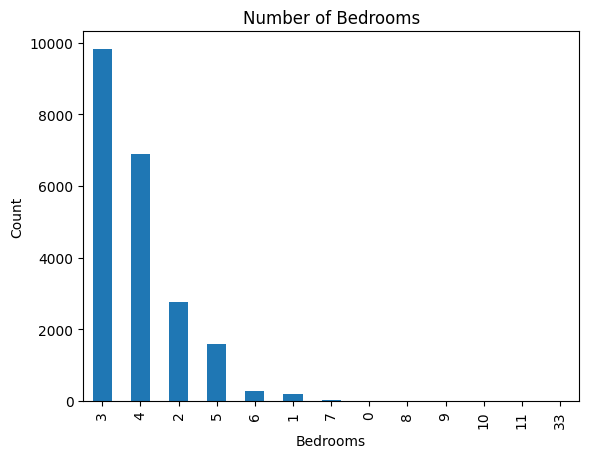

<Figure size 1000x1000 with 0 Axes>

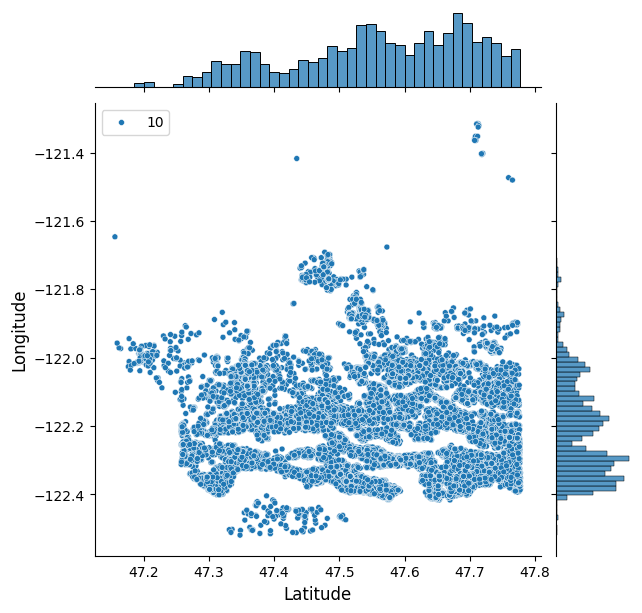

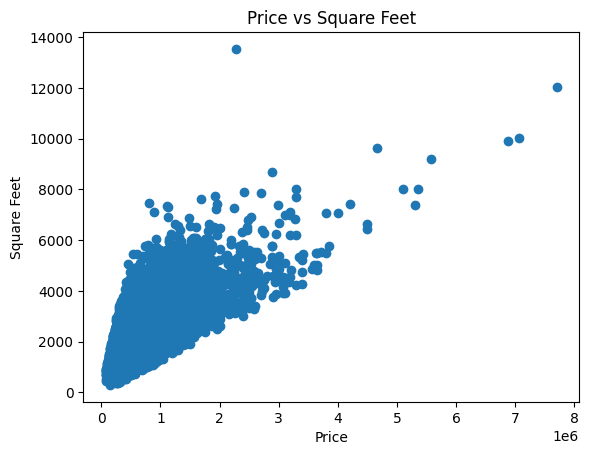

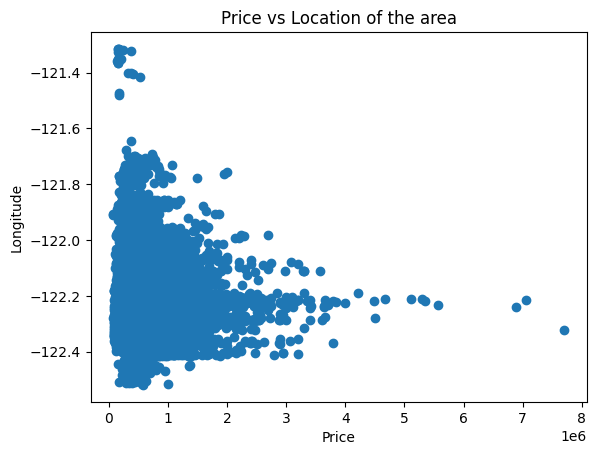

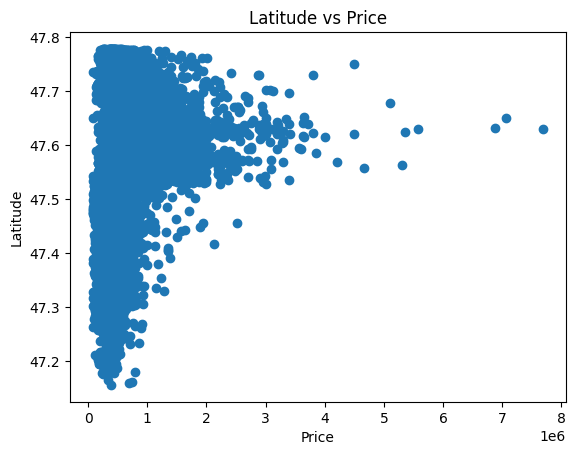

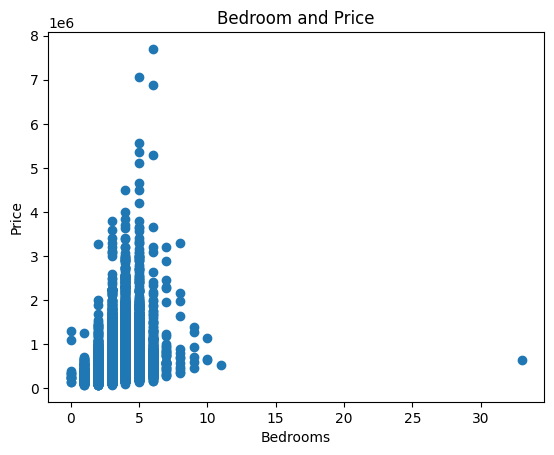

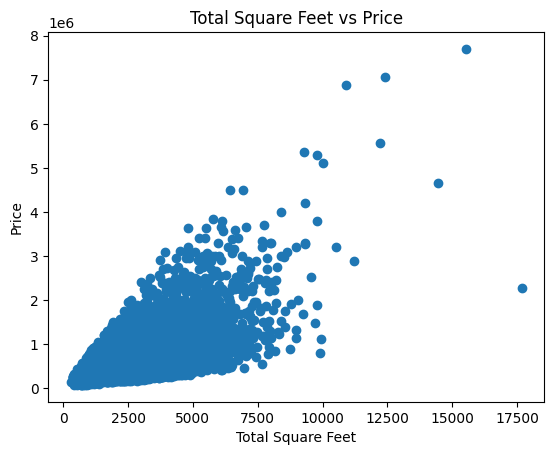

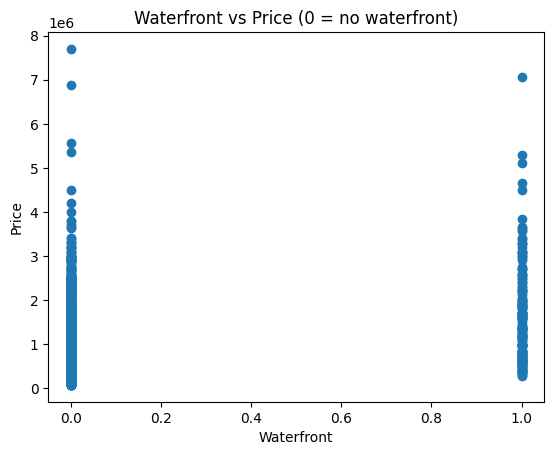

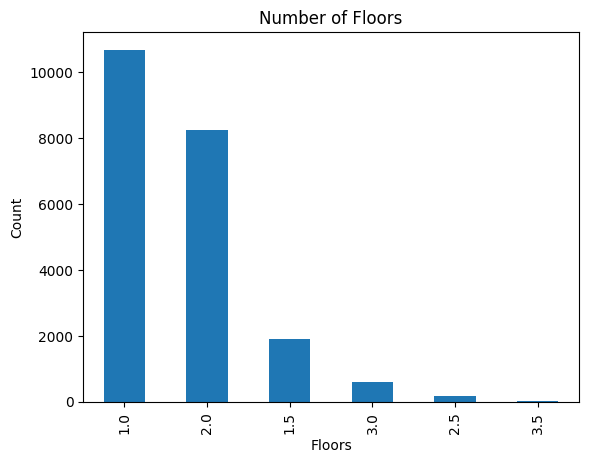

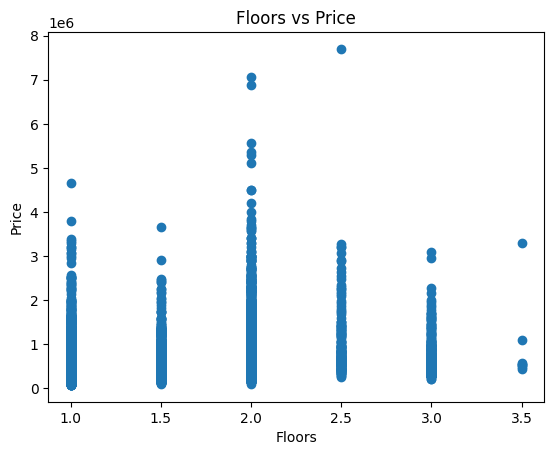

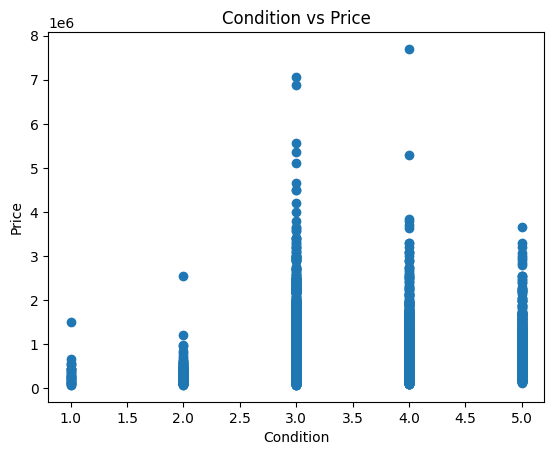

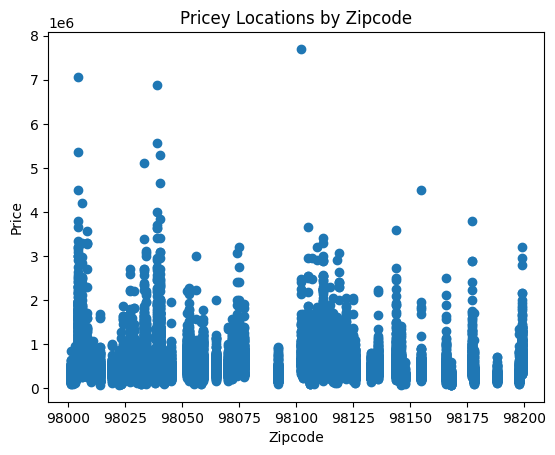

Linear Regression Score: 0.7320342760357581
Gradient Boosting Regressor Score: 0.9198050164202928


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


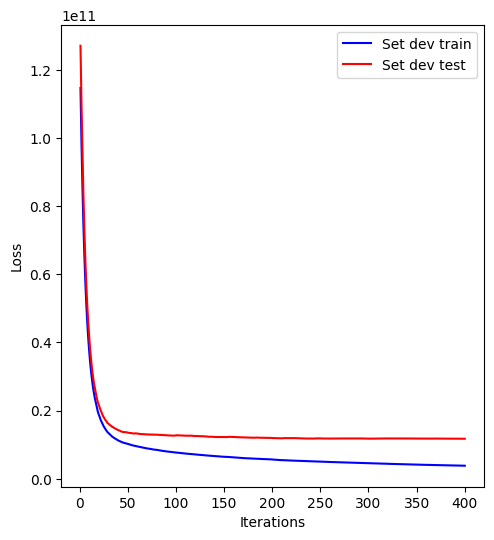

array([[-2.64785461e+00, -4.54699955e-02, -3.16665762e-01, ...,
        -7.94687728e-02, -5.20666456e-17,  0.00000000e+00],
       [-2.34485164e-01,  1.68297114e+00, -7.61521725e-01, ...,
         9.81487761e-01,  1.87724340e-14,  0.00000000e+00],
       [-2.57007792e+00, -6.14344122e-01,  3.49292423e-01, ...,
        -1.38570764e-01,  1.38800865e-16,  0.00000000e+00],
       ...,
       [-2.41985641e+00, -1.10027662e+00, -1.46293798e+00, ...,
         9.66785881e-01, -9.22509880e-17, -0.00000000e+00],
       [ 3.32183025e-01, -1.88043103e+00, -1.04412760e+00, ...,
        -3.97449542e-01,  5.39016888e-17,  0.00000000e+00],
       [-2.43180432e+00, -1.08505981e+00, -1.47248379e+00, ...,
         9.53674385e-01, -9.21412278e-17, -0.00000000e+00]])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

%matplotlib inline

data = pd.read_csv("/content/kc_house_data.csv")

# Visualizations
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet")
plt.show()

plt.scatter(data.price, data.long)
plt.title("Price vs Location of the area")
plt.xlabel("Price")
plt.ylabel("Longitude")
plt.show()

plt.scatter(data.price, data.lat)
plt.title("Latitude vs Price")
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.show()

plt.scatter(data.bedrooms, data.price)
plt.title("Bedroom and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Total Square Feet vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.show()

plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0 = no waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

data.floors.value_counts().plot(kind='bar')
plt.title("Number of Floors")
plt.xlabel("Floors")
plt.ylabel("Count")
plt.show()

plt.scatter(data.floors, data.price)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

plt.scatter(data.condition, data.price)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

plt.scatter(data.zipcode, data.price)
plt.title("Pricey Locations by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()

# Linear Regression
reg = LinearRegression()
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)
reg.fit(x_train, y_train)
print("Linear Regression Score:", reg.score(x_test, y_test))

# Gradient Boosting Regressor
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)
print("Gradient Boosting Regressor Score:", clf.score(x_test, y_test))

# Plotting Train Scores and Test Scores
t_sc = np.zeros((clf.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i] = clf.loss_(y_test, y_pred)

testsc = np.arange((clf.n_estimators)) + 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc, clf.train_score_, 'b-', label='Set dev train')
plt.plot(testsc, t_sc, 'r-', label='Set dev test')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# PCA
pca = PCA()
pca.fit_transform(scale(train1))
